In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-geojson-file/world_countries.json
/kaggle/input/immigration-to-canada/canadian_immegration_data.csv


In [2]:
# Importing the dataset
data = pd.read_csv("/kaggle/input/immigration-to-canada/canadian_immegration_data.csv")
data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
data.shape

(195, 39)

In [4]:
data.Country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong Special Administrative Region',
 'China, Macao Special Administrative Region',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'F

In [5]:
data.columns.tolist()

['Country',
 'Continent',
 'Region',
 'DevName',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 'Total']

In [6]:
asia = data["Continent"] == "Asia"
asia

0       True
1      False
2      False
3      False
4      False
       ...  
190     True
191    False
192     True
193    False
194    False
Name: Continent, Length: 195, dtype: bool

In [7]:
data.Continent.unique().tolist()

['Asia',
 'Europe',
 'Africa',
 'Oceania',
 'Latin America and the Caribbean',
 'Northern America']

In [8]:
asia_data = data[asia]
# asia_data.Country.unique().tolist()
asia_data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
11,Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
13,Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,...,12,12,22,9,35,28,21,39,32,475
14,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [9]:
asia_data.set_index('Country',inplace = True)
asia_data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [10]:
asia_data.index.name = None
asia_data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [11]:
years = list(map(str, range(1980,2014)))
years[0:5]

['1980', '1981', '1982', '1983', '1984']

# Line graph of Indian and Iraqian immigrants to Canada from 1980 to 2013

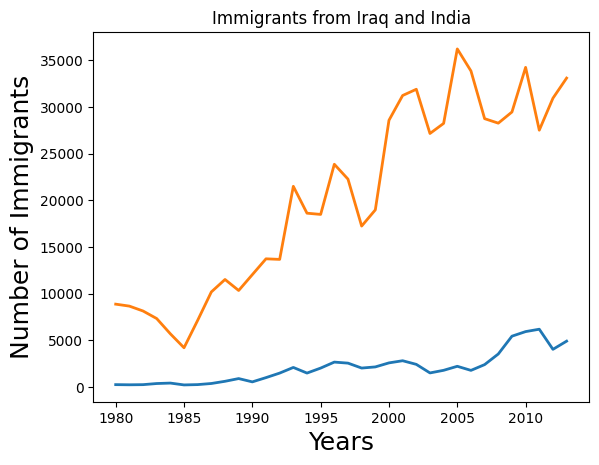

In [12]:
asia_data.loc["Iraq",years].plot(kind='line',linewidth=2)
asia_data.loc["India",years].plot(kind='line',linewidth=2)
plt.xlabel("Years",size=18)
plt.ylabel("Number of Immigrants", size=18)
plt.title("Immigrants from Iraq and India")
plt.show()

In [13]:
# top5 = asia_data['Total'].nlargest(5)
# print(top5)
# top_5 = asia_data['Total'].sort_values(ascending=False).head()
# print(top_5)


In [14]:
asia_data.sort_values(['Total'], ascending=False, axis=0, inplace=True)
asia_data.head()

/tmp/ipykernel_18/2985831341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data.sort_values(['Total'], ascending=False, axis=0, inplace=True)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


In [15]:
dftop5 = asia_data.head()
dftop5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


In [16]:
dftop5 = dftop5[years].transpose()
dftop5.head()

,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
1980,8880,5123,6051,978,1172
1981,8670,6682,5921,972,1429
1982,8147,3308,5249,1201,1822
1983,7338,1863,4562,900,1592
1984,5704,1527,3801,668,1977


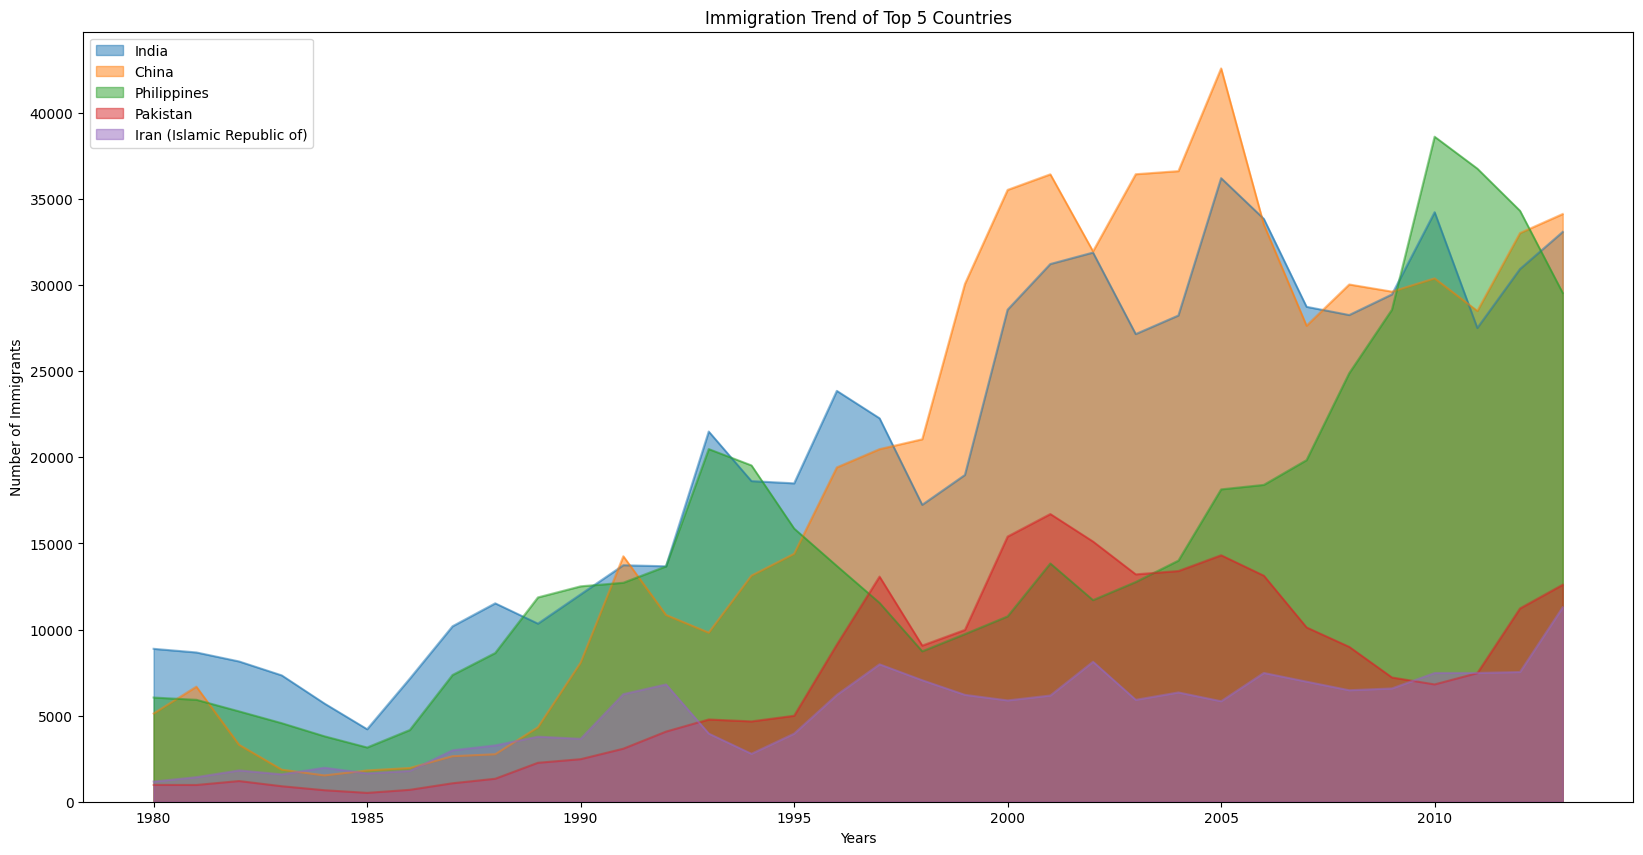

In [17]:
dftop5.index = dftop5.index.map(int)
dftop5.plot(kind='area', stacked=False, figsize = (20,10))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [18]:
least5 = asia_data.tail()
least5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Turkmenistan,Asia,Central Asia,Developing regions,0,0,0,0,0,0,0,...,40,26,37,13,20,30,20,20,14,310
"China, Macao Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,21,32,16,12,21,21,13,33,29,284
Oman,Asia,Western Asia,Developing regions,0,0,0,8,0,0,0,...,14,18,16,10,7,14,10,13,11,224
Qatar,Asia,Western Asia,Developing regions,0,0,0,0,0,0,1,...,11,2,5,9,6,18,3,14,6,157
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30


In [19]:
least5 = least5[years].transpose()
least5.head()

,Turkmenistan,"China, Macao Special Administrative Region",Oman,Qatar,Maldives
1980,0,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,8,0,1
1984,0,0,0,0,0


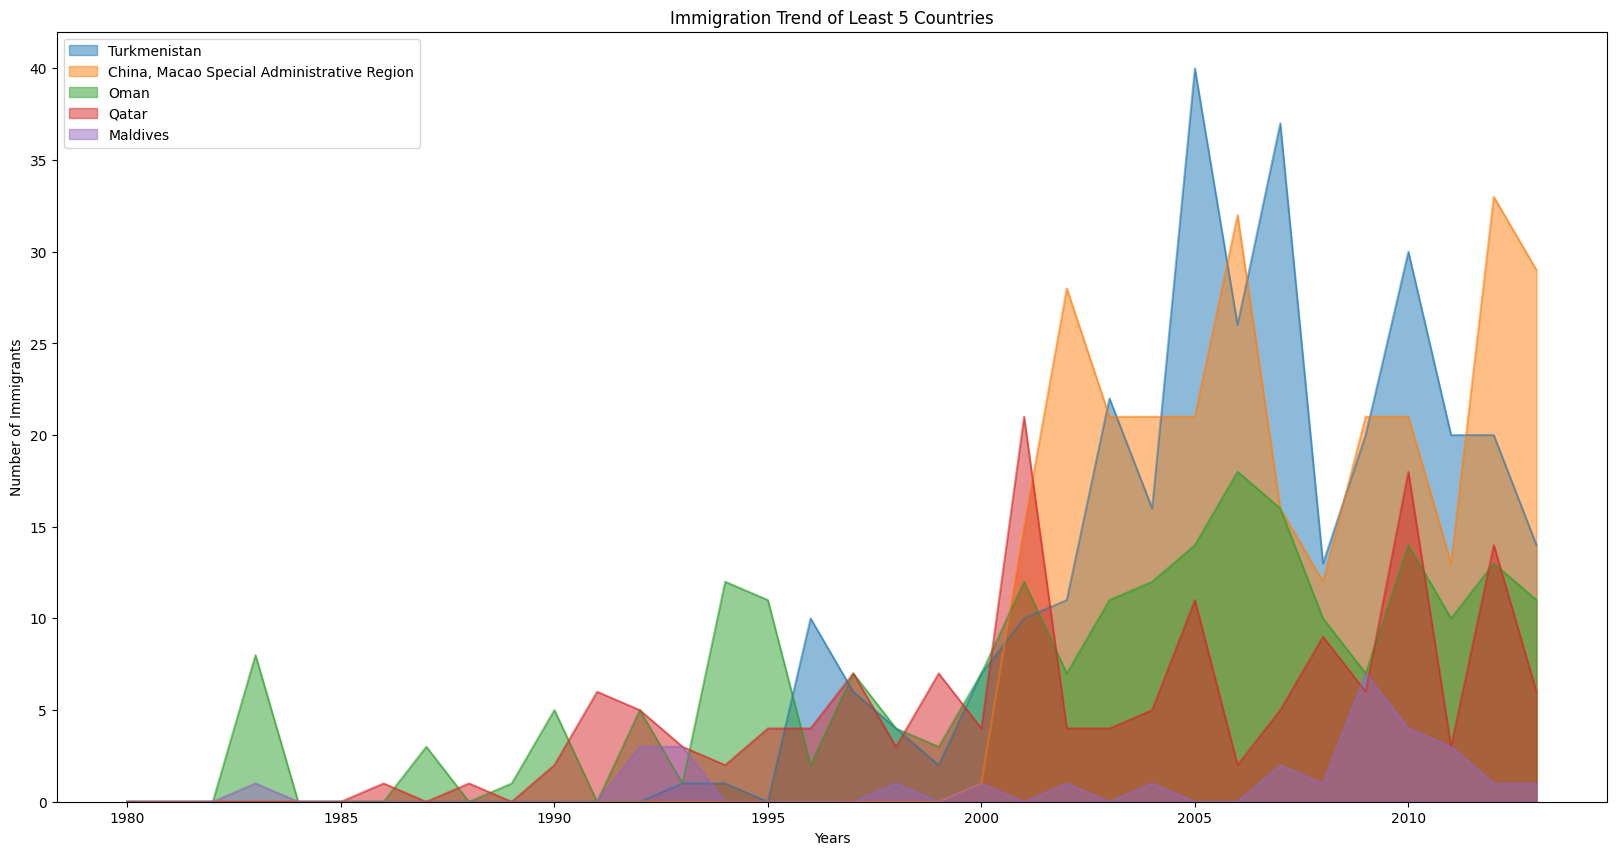

In [20]:
least5.plot(kind="area", stacked=False, figsize=(20,10))
plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Histogram distribution of 195 countries in the year 2012

In [21]:
df12 = asia_data['2012']
df12.head()

India                         30933
China                         33024
Philippines                   34315
Pakistan                      11227
Iran (Islamic Republic of)     7534
Name: 2012, dtype: int64

In [22]:
count,edges = np.histogram(df12)
print(count)
print(edges)

[42  2  1  1  0  0  0  0  0  3]
[1.00000e+00 3.43240e+03 6.86380e+03 1.02952e+04 1.37266e+04 1.71580e+04
 2.05894e+04 2.40208e+04 2.74522e+04 3.08836e+04 3.43150e+04]


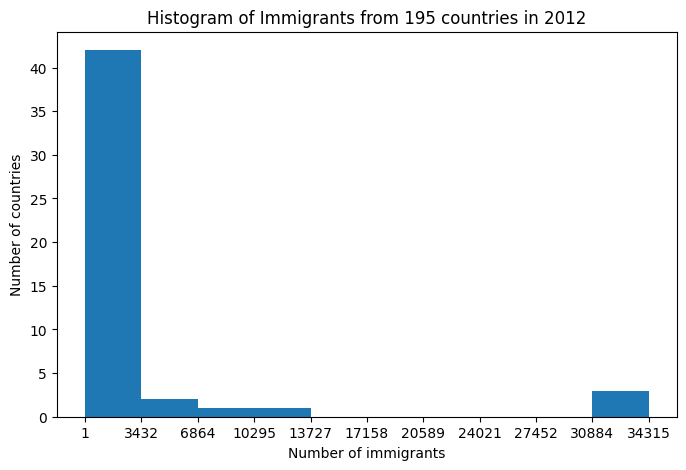

In [23]:
df12.plot(kind='hist',figsize=(8,5),xticks=edges) #using xticks parameter to properly match xlabels with the data
plt.title("Histogram of Immigrants from 195 countries in 2012")
plt.xlabel("Number of immigrants")
plt.ylabel("Number of countries")
plt.show()

**Histogram distribution of India, China and Pakistan for year 1980 to 2013**

In [24]:
df3con = asia_data.loc[['India','China','Pakistan'],years]
df3con

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [25]:
df3con = df3con[years].transpose()
df3con.head()

,India,China,Pakistan
1980,8880,5123,978
1981,8670,6682,972
1982,8147,3308,1201
1983,7338,1863,900
1984,5704,1527,668


In [26]:
count,edges = np.histogram(df3con,15) #creating bin size 15
print(count)
print(edges)

[19  8 10 11 12  4  4  4  1  6  9  7  6  0  1]
[  514.          3318.66666667  6123.33333333  8928.
 11732.66666667 14537.33333333 17342.         20146.66666667
 22951.33333333 25756.         28560.66666667 31365.33333333
 34170.         36974.66666667 39779.33333333 42584.        ]


In [27]:
# import matplotlib
# for name, hex in matplotlib.colors.cnames.items():
#     print(name, hex)

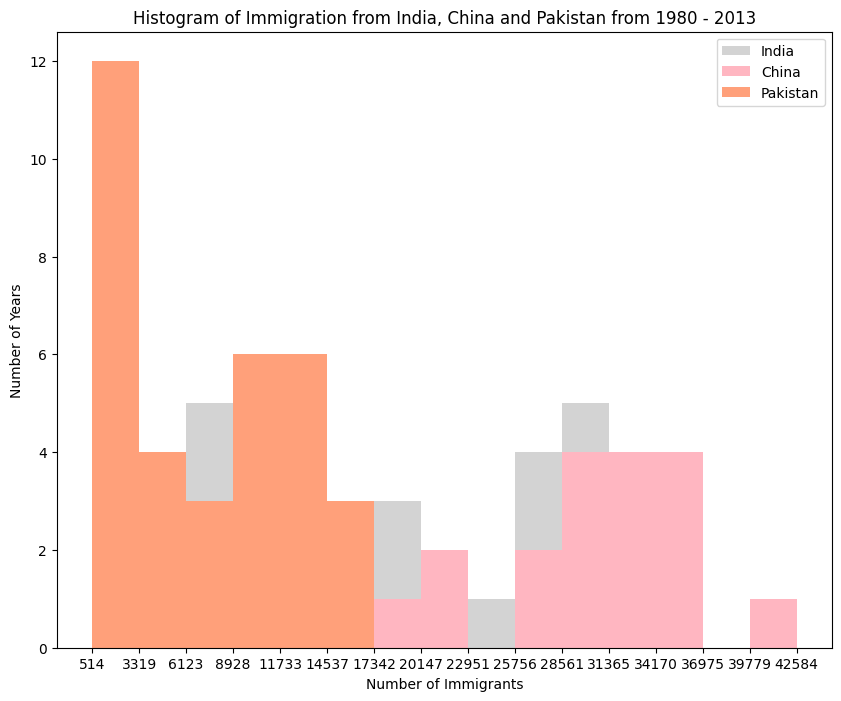

In [28]:
df3con.plot(kind='hist',
           figsize=(10,8),
           bins=15,
           xticks=edges,
           color = ['lightgrey','lightpink','lightsalmon'] 
           )
plt.title('Histogram of Immigration from India, China and Pakistan from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Number of Immigrants from India to Canada in year 1980 to 2013 using Bar Graph

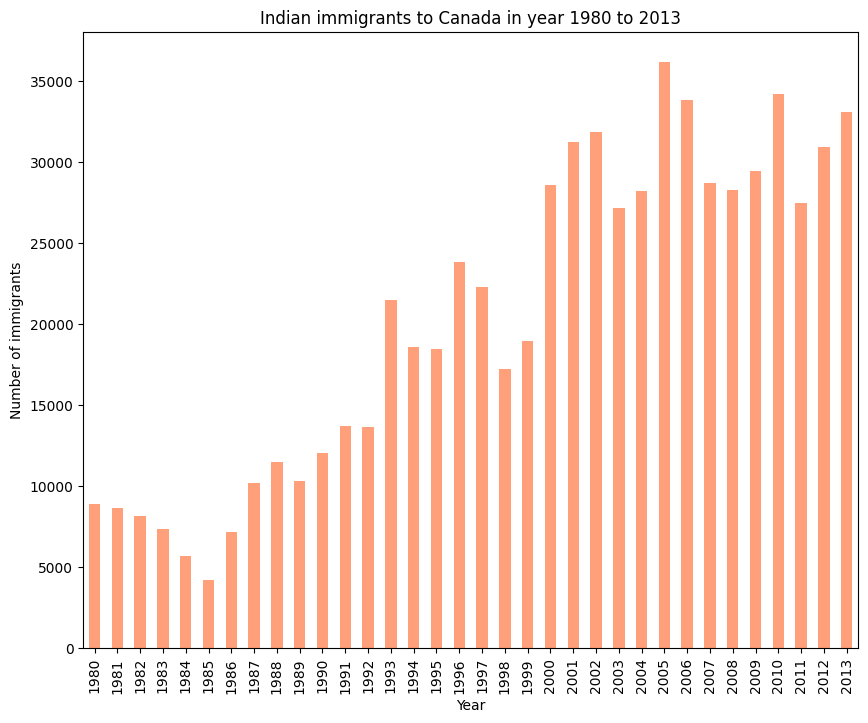

In [29]:
dfin = asia_data.loc['India',years]
dfin.plot(kind='bar',figsize=(10,8),color='lightsalmon')
plt.title('Indian immigrants to Canada in year 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.show()

# Proportion of immigrants grouped by continents for the entier time period from 1980 to 2013

In [30]:
data.set_index('Country',inplace=True)
data.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [31]:
df_continent = data.groupby('Continent',axis=0).sum()
df_continent

/tmp/ipykernel_18/2996658431.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continent = data.groupby('Continent',axis=0).sum()


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,PolynesiaAustralia and New ZealandMelanesiaMic...,Developing regionsDeveloped regionsDeveloping ...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


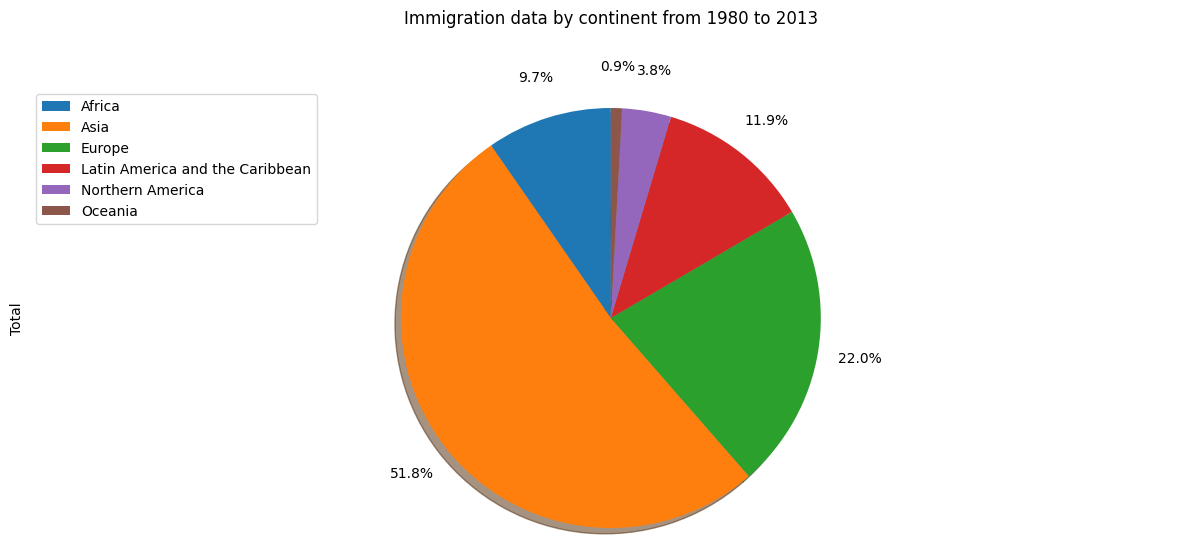

In [32]:
df_continent["Total"].plot(kind='pie',
                 shadow=True,
                 figsize=(15,6),
                 startangle=90,
                 labels=None,
                 autopct='%1.1f%%',
                 pctdistance=1.2)
plt.axis('equal')
plt.title("Immigration data by continent from 1980 to 2013", y=1.12)
plt.legend(df_continent.index,loc='upper left')
plt.show()

# **Box plot of India and China**

In [33]:
ndf_ci = asia_data.loc[['India','China'],years]
ndf_ci = ndf_ci[years].transpose()
ndf_ci

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527
1985,4211,1816
1986,7150,1960
1987,10189,2643
1988,11522,2758
1989,10343,4323


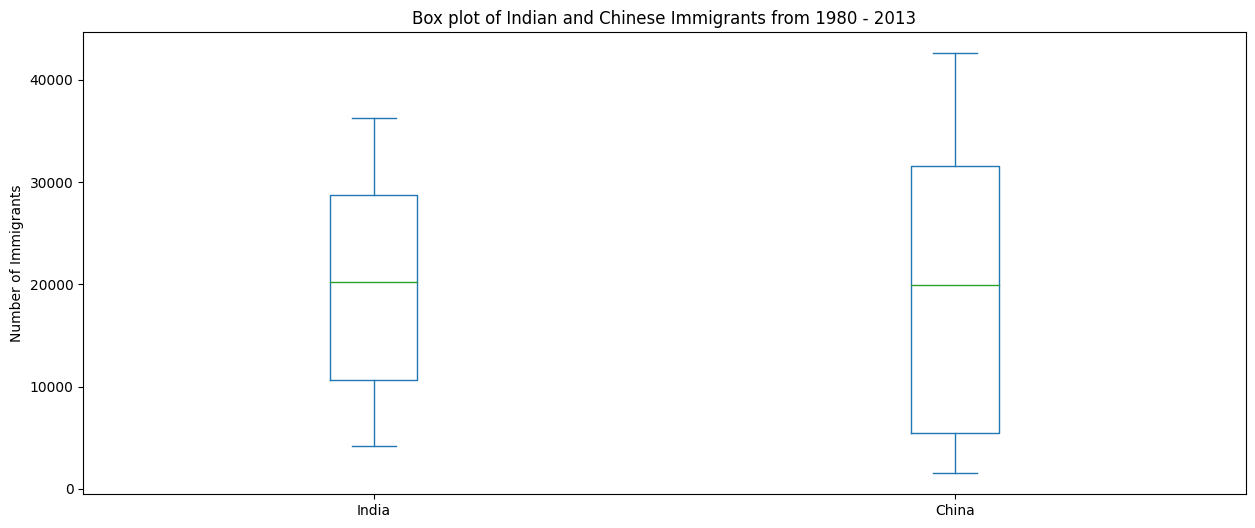

In [34]:
ndf_ci.plot(kind='box',figsize=(15,6))
plt.title('Box plot of Indian and Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

# **Visualizing total immigration by year using scatter plot**

In [35]:
data.reset_index(inplace=True)
data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


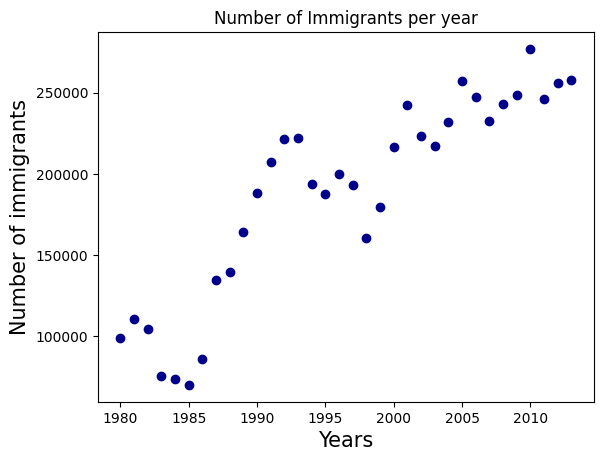

In [36]:
df_tot = data[years].sum()
# df_tot.plot(kind='scatter')
x = list(map(int,df_tot.index))
z = list(df_tot[years])
plt.scatter(x,z,color='darkblue')
plt.xlabel('Years',size=15)
plt.ylabel('Number of immigrants', size=15)
plt.title("Number of Immigrants per year")
plt.show()

# **Visualization of immigrants from 195 countries to Canada using FOLIUM and CHOROPLETH MAP**

In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. Let's name it world_countries.json.

In [37]:
#Import folium module
import folium 
import json
#x = '/kaggle/input/world-geojson-file' # geojson file
world_geo = r'/kaggle/input/world-geojson-file/world_countries.json'
world_map = folium.Map(location=[0,0],zoom_start=2)
world_map

In [38]:
folium.Choropleth(
    geo_data=world_geo,
    data=data,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# display map
world_map